<a href="https://colab.research.google.com/github/Maryam-Hussein/Technocolabs-Internship-Mini-Project/blob/main/BigMart_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technocolabs Internship Mini Project**
***Maryam Hussein***

In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import pandas_profiling

# **Loading Data**

In [104]:
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [105]:
df_train = pd.read_csv("input/Train.csv") # List training dataset
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
df_train.isnull().sum() #Checking missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

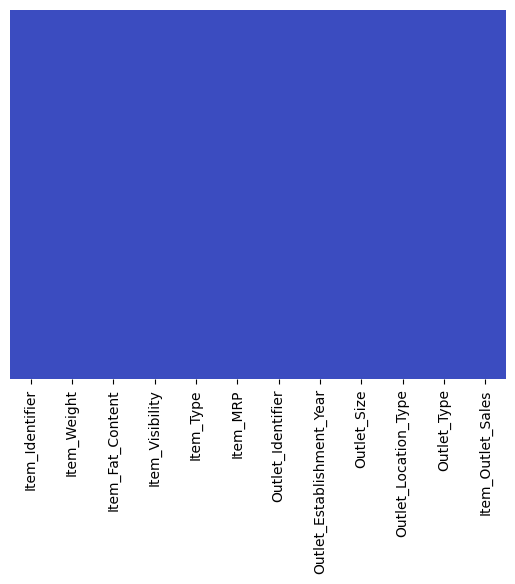

In [107]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
#Check still have missing values in dataset?
import seaborn as sns
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [108]:
df_train.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: >

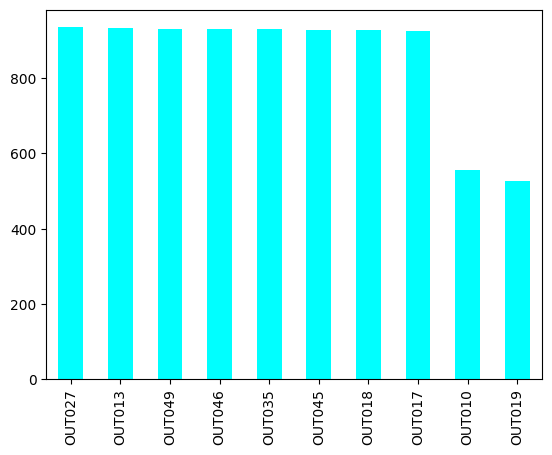

In [110]:
#Visualizing the "Outlet_Identifier"
df_train['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Cyan')

In [111]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# **Univariate Data Visualizations**

<Axes: >

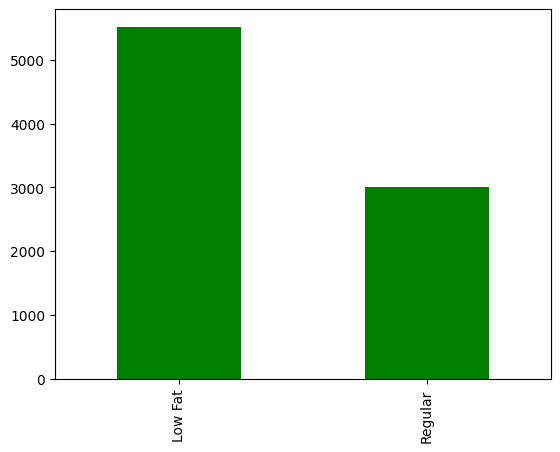

In [112]:
df_train =  df_train.replace(to_replace ="low fat",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="LF",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="reg",  value ="Regular") 

#Visualizing the "Item_Fat_Content"
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')

<Axes: >

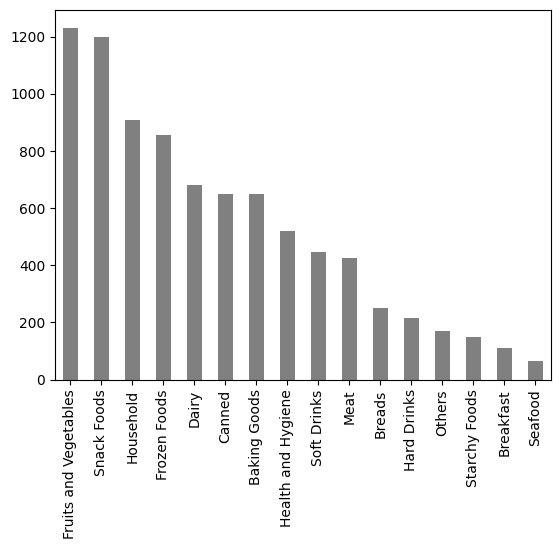

In [113]:
#Visualizing the "Item_Type"
df_train['Item_Type'].value_counts().plot(kind='bar',color = 'gray')

<Axes: >

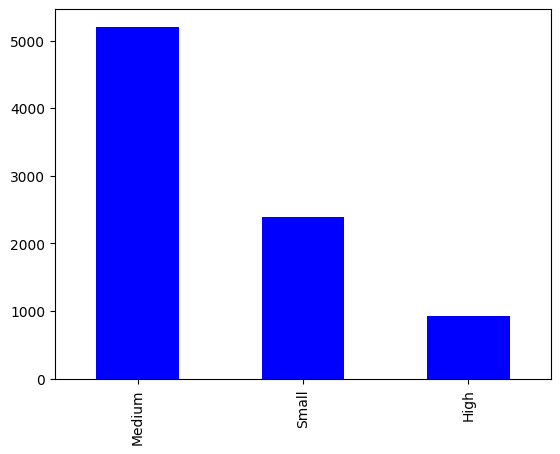

In [114]:
#Visualizing the "Outlet_Size"
df_train['Outlet_Size'].value_counts().plot(kind='bar',color = 'blue')

<Axes: >

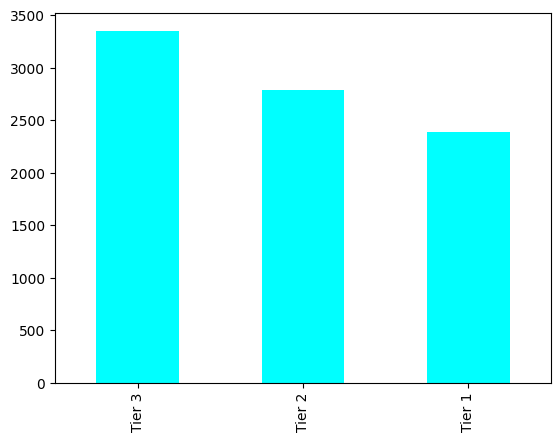

In [115]:
#Visualizing the "Outlet_Location_Type"
df_train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'cyan')

<Axes: >

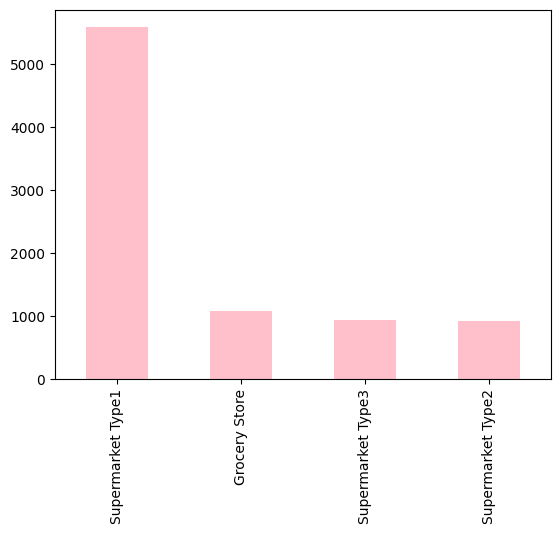

In [116]:
#Visualizing the "Outlet_Type"
df_train['Outlet_Type'].value_counts().plot(kind='bar',color = 'pink')

<ipython-input-117-f5876c94d8a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'purple')


<Axes: xlabel='Item_Weight', ylabel='Density'>

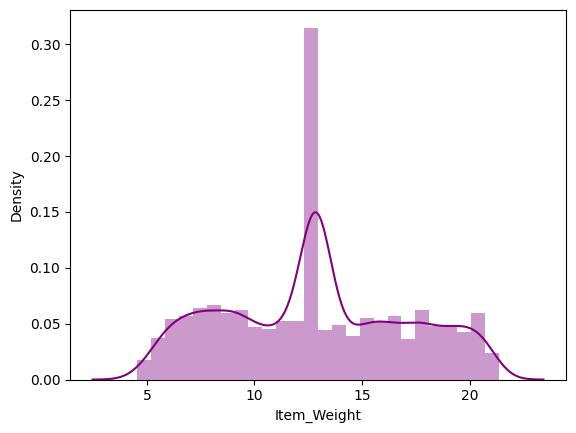

In [117]:
y = df_train['Item_Weight']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'purple')

<ipython-input-118-f875ea6d08ac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'green')


<Axes: xlabel='Item_Visibility', ylabel='Density'>

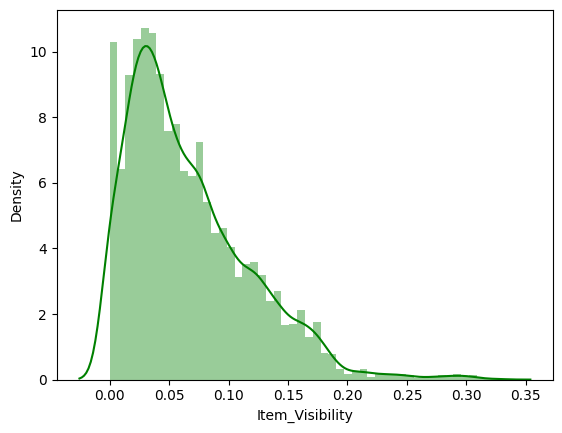

In [118]:
y = df_train['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

<ipython-input-120-19bd97f397ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'brown')


<Axes: xlabel='Item_MRP', ylabel='Density'>

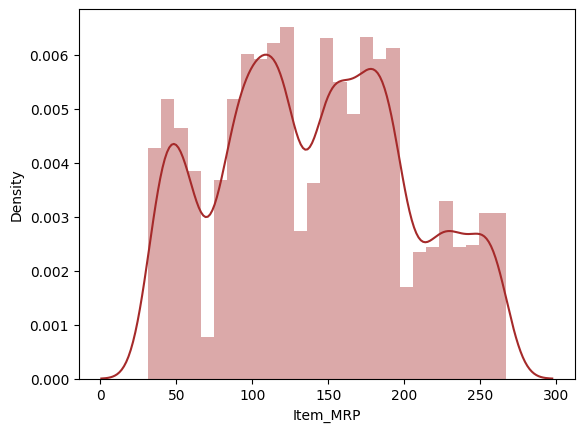

In [120]:
y = df_train['Item_MRP']
plt.figure(1);
sns.distplot(y, kde=True,color = 'brown')

<ipython-input-121-04b78d8b8f3e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'purple')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

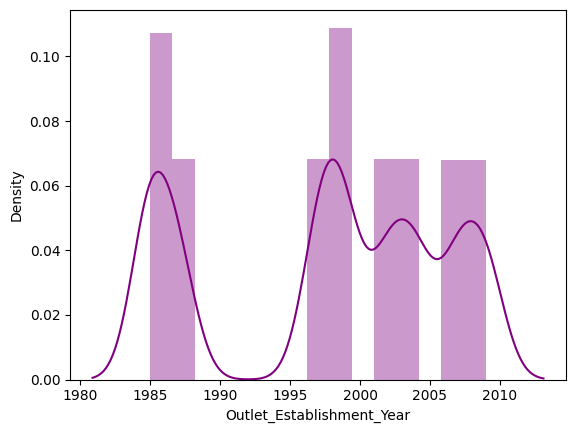

In [121]:
y = df_train['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'purple')

<ipython-input-122-e953c610a444>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'yellow')


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

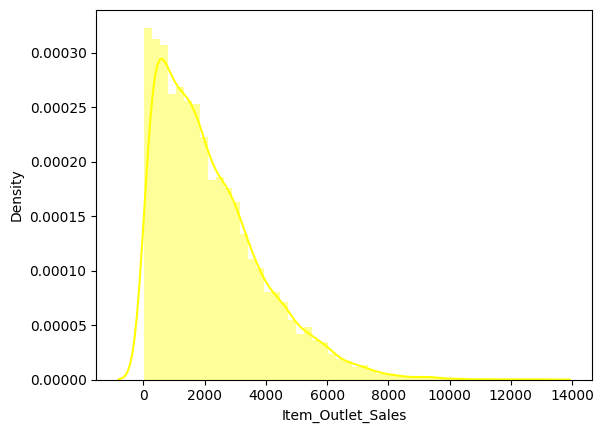

In [122]:
y = df_train['Item_Outlet_Sales']
plt.figure(1);
sns.distplot(y, kde=True,color = 'yellow')

In [123]:
df_train["Qty_Sold"] = (df_train["Item_Outlet_Sales"]/df_train["Item_MRP"])
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


# **Exploratory Data Analysis(EDA)**

<Axes: >

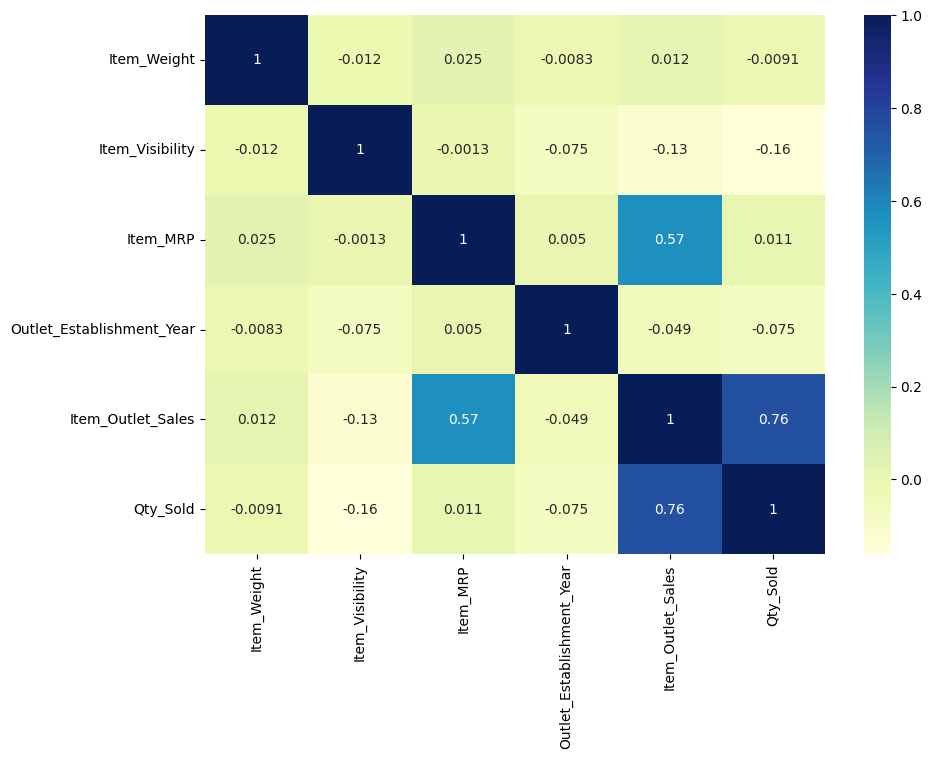

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

In [125]:
categorical_columns=[x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns

df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [126]:
#print frequencies of these categories
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(df_train[col].value_counts())
    print("\n")

Frequency of categories for variable
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Frequency of categories for variable
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Frequency of categories for variable
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Frequency of categories for variable
Supermarket Type1    5577
Grocery Store        1083
Supermarket T

In [127]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_train.columns:
    df_train[col] = labelencoder.fit_transform(df_train[col])
    #Now one hot encoding
df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(df_train.shape)

(8523, 34)


In [128]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Qty_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [129]:
df = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales', 'Qty_Sold']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales,Qty_Sold
0,284,664,5592,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2540,4084
1,57,880,473,8,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,422,2217
2,376,715,2901,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1639,3972
3,393,0,4227,3,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,670,1119
4,265,0,627,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,865,5315


In [130]:
df.shape

(8523, 34)

In [131]:
# iterating the columns 
for col in df.columns: 
    print(col)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Fat_Content_0
Item_Fat_Content_1
Item_Type_0
Item_Type_1
Item_Type_2
Item_Type_3
Item_Type_4
Item_Type_5
Item_Type_6
Item_Type_7
Item_Type_8
Item_Type_9
Item_Type_10
Item_Type_11
Item_Type_12
Item_Type_13
Item_Type_14
Item_Type_15
Outlet_Size_0
Outlet_Size_1
Outlet_Size_2
Outlet_Location_Type_0
Outlet_Location_Type_1
Outlet_Location_Type_2
Outlet_Type_0
Outlet_Type_1
Outlet_Type_2
Outlet_Type_3
Item_Outlet_Sales
Qty_Sold


In [132]:
#Separating features and label
X = df.iloc[:,0:33].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[6.10394230e-01 3.35737063e-01 5.28963051e-02 9.71299848e-04
 8.05715240e-07 6.86337627e-08 5.01485081e-08 2.85864445e-08
 2.58976441e-08 1.90387610e-08 1.50603608e-08 1.29257303e-08
 1.03976730e-08 9.65145933e-09 8.33101886e-09 8.09467669e-09
 6.72391989e-09 6.41505808e-09 5.74725453e-09 5.10424209e-09
 3.35510208e-09 2.72304646e-09 2.25800042e-09 1.95947055e-09
 1.65075968e-09 1.40224435e-09 8.96373832e-10 5.79551476e-10
 3.94593426e-33 3.94593426e-33 3.94593426e-33 3.94593426e-33
 3.94593426e-33]


In [133]:
len(explained_variance)

33

In [134]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.6103942302780854, 0.3357370634408003, 0.05289630513664155, 0.0009712998481694148, 8.057152404511474e-07, 6.863376274915171e-08, 5.014850813766624e-08, 2.858644446155589e-08, 2.5897644122210764e-08, 1.903876098556518e-08, 1.506036083130962e-08, 1.2925730268760926e-08, 1.0397672985759154e-08, 9.651459329541203e-09, 8.331018856622041e-09, 8.094676689747245e-09, 6.723919893576689e-09, 6.415058079298107e-09, 5.747254534657664e-09, 5.1042420871578e-09, 3.355102078823466e-09, 2.7230464604746854e-09, 2.258000420755252e-09, 1.959470547859085e-09, 1.6507596848019621e-09, 1.402244346284231e-09, 8.963738320443836e-10, 5.79551476265241e-10, 3.9459342597126464e-33, 3.9459342597126464e-33, 3.9459342597126464e-33, 3.9459342597126464e-33, 3.9459342597126464e-33]


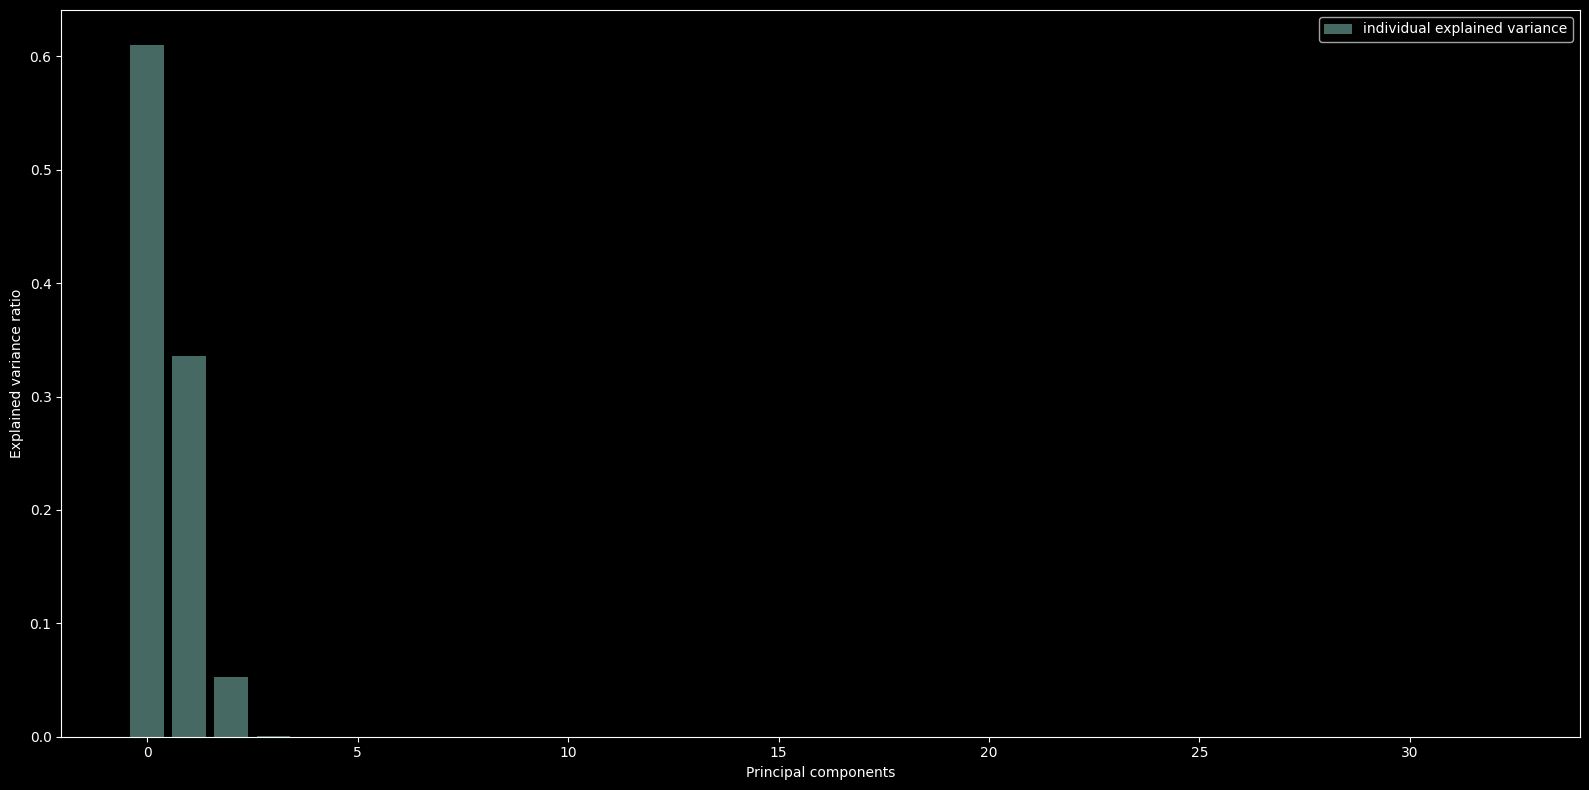

In [135]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 8))
    
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [136]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.61039423 0.33573706 0.05289631]


In [137]:
#Model comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
#Fit Decision_tree
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [138]:
#Fit Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [139]:
#Fit Random_forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [140]:
#Fit Ada_Boost_Regressor
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)

AdaBoostRegressor()

In [141]:
#Fit Bagging_Regressor..........
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

BaggingRegressor()

In [142]:
#Fit Extra_tree_regressor........
Extra_trees = ExtraTreesRegressor()
Extra_trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [143]:
#Fit Gradient_Boosting_Regressor
Gradient_boosting = GradientBoostingRegressor()
Gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [144]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('Ada_boost',Ada_boost),('Bagging',Bagging),('Extra_trees',Extra_trees),('Gradient_boosting',Gradient_boosting)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']


#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

print(results[20])

{'fit_time': array([0.73491597, 0.73753643, 0.72862315, 0.84655285, 0.87248707,
       0.80067301, 0.72047019, 0.72569442, 0.72456837, 0.71645308]), 'score_time': array([0.00185227, 0.00187302, 0.00187278, 0.00218654, 0.00251961,
       0.00179458, 0.00183845, 0.00195575, 0.00219536, 0.00179291]), 'test_score': array([0.99434539, 0.99386995, 0.99241878, 0.99364933, 0.99285437,
       0.99384883, 0.99304793, 0.99363296, 0.9937016 , 0.99263827]), 'train_score': array([0.99515365, 0.99489962, 0.99461739, 0.99476625, 0.99451677,
       0.99489476, 0.99478788, 0.99512551, 0.99481143, 0.99462345])}


In [145]:
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()




#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
ADA_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
ADA_RMSE_std= results[9]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
ADA_MAE_mean = -results[10]['test_score'].mean()
ADA_MAE_std= results[10]['test_score'].std()
ADA_r2_mean = results[11]['test_score'].mean()
ADA_r2_std = results[11]['test_score'].std()



#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
BAGGING_RMSE_mean = np.sqrt(-results[12]['test_score'].mean())
BAGGING_RMSE_std= results[12]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
BAGGING_MAE_mean = -results[13]['test_score'].mean()
BAGGING_MAE_std= results[13]['test_score'].std()
BAGGING_r2_mean = results[14]['test_score'].mean()
BAGGING_r2_std = results[14]['test_score'].std()


#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
ET_RMSE_mean = np.sqrt(-results[15]['test_score'].mean())
ET_RMSE_std= results[15]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
ET_MAE_mean = -results[16]['test_score'].mean()
ET_MAE_std= results[16]['test_score'].std()
ET_r2_mean = results[17]['test_score'].mean()
ET_r2_std = results[17]['test_score'].std()


#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
GB_RMSE_mean = np.sqrt(-results[18]['test_score'].mean())
GB_RMSE_std= results[18]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
GB_MAE_mean = -results[19]['test_score'].mean()
GB_MAE_std= results[19]['test_score'].std()
GB_r2_mean = results[20]['test_score'].mean()
GB_r2_std = results[20]['test_score'].std()
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees','Ada Boosting','Bagging','Extra trees','Gradient Boosting'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean,ADA_RMSE_mean,BAGGING_RMSE_mean,ET_RMSE_mean,GB_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std,ADA_RMSE_std,BAGGING_RMSE_std,ET_RMSE_std,GB_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean,ADA_MAE_mean,BAGGING_MAE_mean,ET_MAE_mean,GB_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std, ADA_MAE_std, BAGGING_MAE_std, ET_MAE_std, GB_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean, ADA_r2_mean,BAGGING_r2_mean, ET_r2_mean, GB_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std, ADA_r2_std,BAGGING_r2_std, ET_r2_std, GB_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

    
modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
5,Extra trees,102.035201,862.111942,73.238361,2.442197,0.998107,0.000161
1,Random Forest,109.725976,717.579472,79.844848,1.967241,0.997826,0.000154
4,Bagging,122.658446,1123.500481,89.328722,3.585061,0.997260,0.000171
2,Decision Trees,186.825723,2709.089578,133.047342,3.691701,0.993690,0.000552
6,Gradient Boosting,190.815972,3256.137718,144.428712,6.304777,0.993401,0.000591
3,Ada Boosting,466.394094,18760.261612,386.733364,15.822366,0.961353,0.002643
0,Linear Regression,751.266385,28450.046795,543.986537,12.821990,0.897669,0.005637


In [147]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

ETC = ExtraTreesRegressor()
gb_param_grid = {'n_estimators' : [100,200,300,400,500],
              'max_depth': [4, 8,12,16],
              'min_samples_leaf' : [100,150,200,250],
              'max_features' : [0.3, 0.1] 
              }

gsETC = GridSearchCV(ETC,param_grid = gb_param_grid, cv=10, n_jobs= -1, verbose = 0)

gsETC.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150, 200, 250],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [148]:
ETC = ExtraTreesRegressor(max_depth= 8,max_features = 0.3,min_samples_leaf =  100,n_estimators= 500)
ETC.fit(X_train, y_train)


#predicting the test set
y_pred = ETC.predict(X_test)
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1442.8810262669392
MSE: 2741348.339198669
RMSE: 1655.7017663814547
